# 파일 경로 확인

In [1]:
%ls

LICENSE                        loan_data/
README.md                      loan_default_prediction.ipynb


In [2]:
%cd loan_data

/Users/jiyeon/Documents/DS/capstone_project_2/repo/loan-default-prediction-model/loan_data


# 라이브러리 import

In [3]:
# 데이터 프레임 
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분류, 데이터 학습 라이브러리
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix ## precision, recall 확인
from imblearn.over_sampling import SMOTE
import lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
import shap
from shap import TreeExplainer, summary_plot
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn import metrics

## 라이브러리 체크? 

# 데이터 불러오기

## 데이터 설명

### 이 데이터는 (https://www.kaggle.com/c/home-credit-default-risk)에서 가져왔고, 이 데이터는 고객의 상환가능 여부를 나타내주는 데이터이다. 

## 이 데이터에 대한 취지

### 금융거래가 없어 금융서비스를 제대로 이용하지 못하는 사람들
### 금융 데이터 이외에 데이터로 상환여부를 예측할 수 있도록 데이터 제공
### 더 많은 사람들이 금융 서비스를 이용할 수 있도록 하기 위한 취지 

### 금융 거래 데이터가 없는 사람에게 금융서비스 제공

## 데이터 가져오기

In [4]:
## train 데이터 불러오기
df_train = pd.read_csv('application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## test 데이터 불러오기

df_test = pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
## previous data 가져오기
prev_df = pd.read_csv('previous_application.csv')
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [7]:
## credit_balance
credit_balance_df = pd.read_csv('credit_card_balance.csv')
credit_balance_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


# 풀고자하는 문제
 

## 기본대출(금융) 정책에 대해서 검토하고하는 담당자에게 정책을 시행하기전 고려할 사항을 검토

### 금융 데이터를 통해서 정책을 시행하고자하는 대출액, 연령, 소득에 따른 상환율을 데이터 분석

### 상환여부 예측과 상환가능 금액 예측

# 성능지표평가

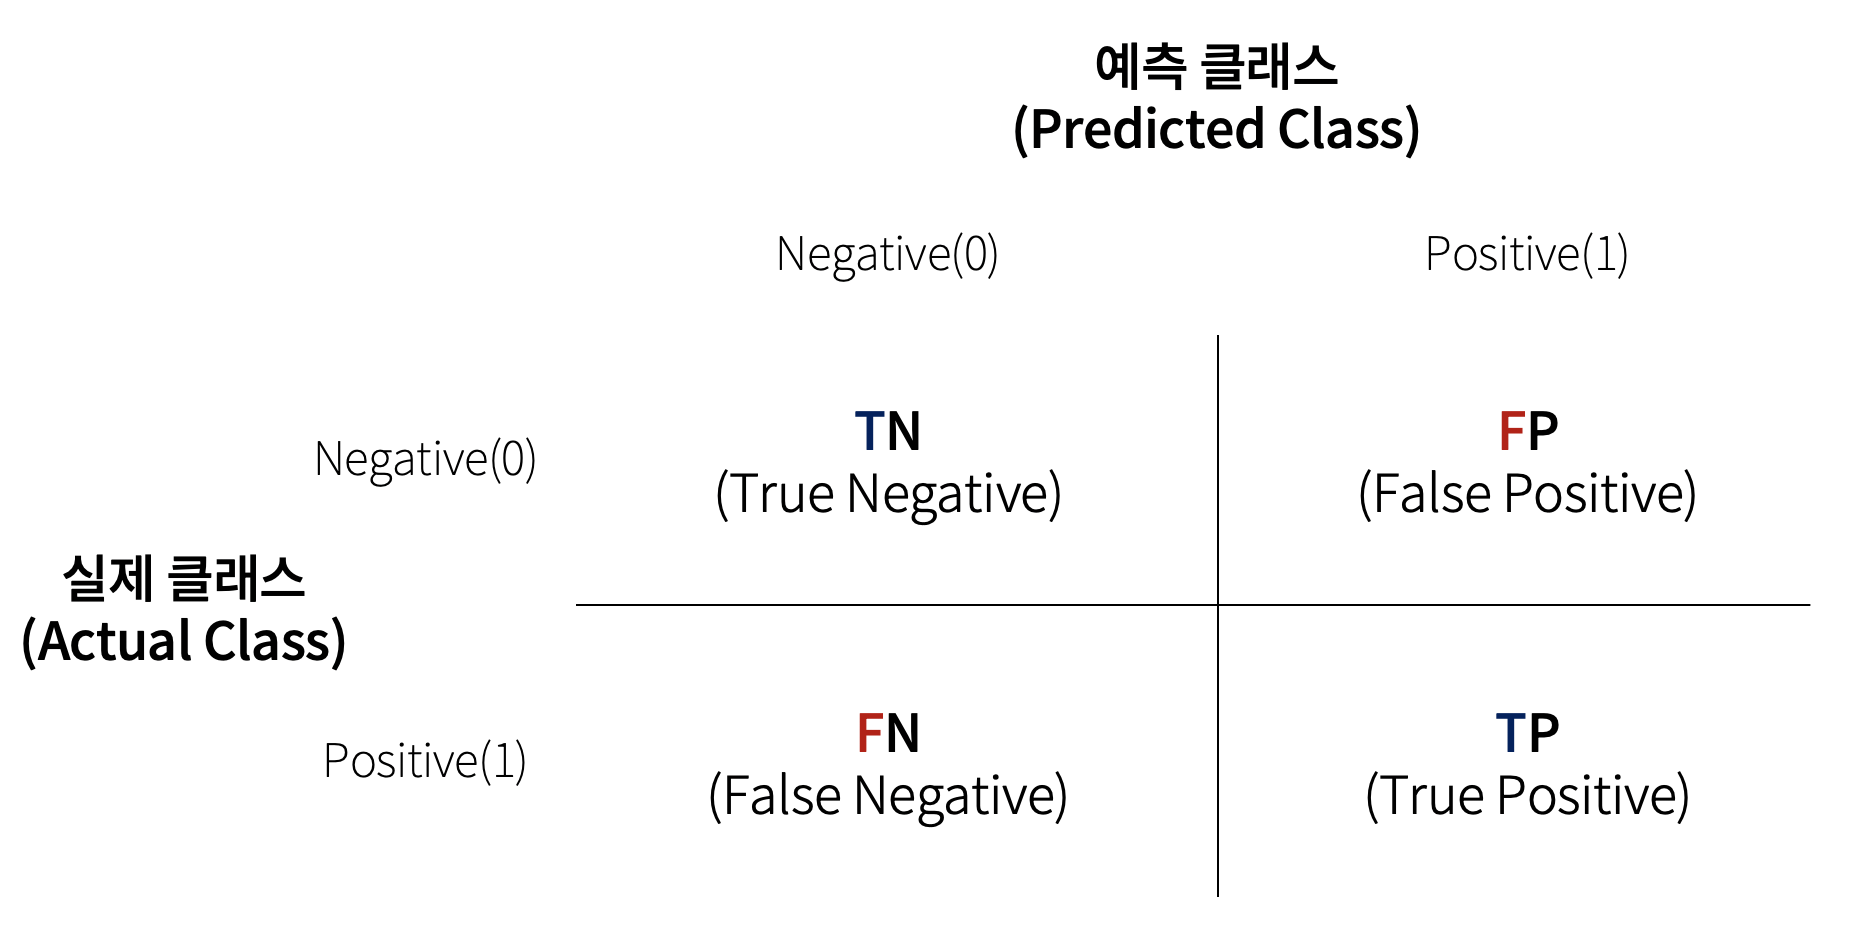

## 1. 정확도(Accuracy)
### 전체범주에서 모두 바르게 맞춘 경우를 전체수로 나눈 값이다. 
### 공식은 (TP+TN)/Total

## 2. 정밀도(precision)
### True로 예측한 경우 중 실제 True인 비율
### TP/(TP+FP)

## 3. 재현율(recall)
### 실제 Ture 중 True로 예측한 비율
### TP/(TP+FN)


## 4. F1 score
### precision과 recall을 조합하여 하나의 통계치로 나타냄
### F1=2∗(precision∗recall)/precision+recall

# 데이터 살펴보기

In [8]:
## 데이터 정보확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
## 칼럼명 확인
df_columns_list = df_train.columns.values.tolist()

In [10]:
## 타켓의 분포확인
df_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## 데이터 타켓(상환여부) 분포확인
### 타켓의 값이 상환이 가능한 사람들은 0이고, 상환이 어려운 사람들은 1이다.
### 기본적인 베이스라인 모델의 성능은 91.9% 이상이여야 의미가 있다. 
### 하지만 불균형한 클래스를 지니고 있기 때문에, 목적에 따라 정확도(accuracy),  정밀도(precision), 재현율(recall), f1-score를 참조 모델의 성능을 개선해야 한다. 


## 데이터 셋 살펴보기 

In [11]:
df_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터 비율확인하기

In [12]:
## 성별 비율
df_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [13]:
##  차 소유 비율
df_train['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [14]:
## 집/ 아파트 유무
df_train['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

### 경제적인 것과 직접적인 관련있는 데이터 확인해보기

In [15]:
## 고객의 평균 수입 확인
df_train['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f')) ## scientific notation 없애기

##  평균 수입 : 168,797

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [16]:
## 대출액 기본 정보 확인
df_train['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

## 평균 대출액 : 599,025

count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

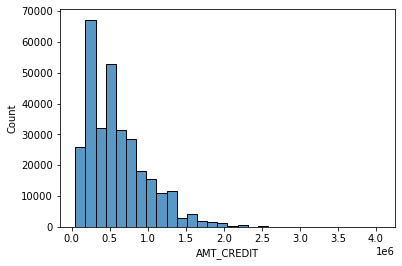

In [17]:
## 대출액 빈도 확인해보기
sns.histplot(data=df_train, x='AMT_CREDIT', bins=30)

<AxesSubplot:>

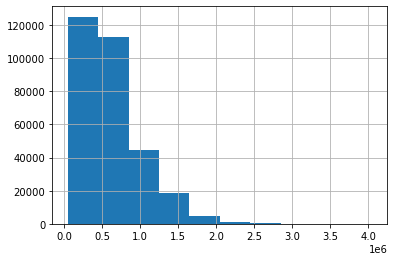

In [18]:
## 대출금액 구간을 나눠서 보자

df_train['AMT_CREDIT'].value_counts()
df_train['AMT_CREDIT'].hist()

In [19]:
## 대출금이 100,000 이하의 대출 정보만 확인
credit_amt_10 = df_train[df_train['AMT_CREDIT'] <= 100000]
credit_amt_10

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
63,100075,0,Cash loans,F,N,N,0,112500.0,95940.0,10462.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
108,100127,0,Cash loans,M,N,Y,0,112500.0,52128.0,5341.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
186,100216,0,Cash loans,F,N,N,0,90000.0,67500.0,6705.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
214,100249,0,Cash loans,F,N,Y,2,67500.0,76410.0,4513.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307282,455999,0,Cash loans,M,Y,Y,0,112500.0,71955.0,8136.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307291,456014,0,Cash loans,F,N,Y,1,112500.0,50940.0,5877.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307294,456017,0,Cash loans,F,N,N,2,54000.0,81504.0,8775.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0
307400,456133,0,Cash loans,M,N,Y,0,67500.0,47970.0,5296.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

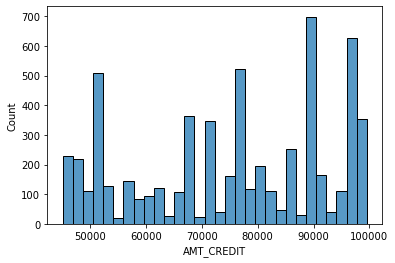

In [20]:
## $100,000 이하 대출액 분포확인
sns.histplot(data=credit_amt_10, x='AMT_CREDIT', bins=30)

In [21]:
## 대출종류 확인/ 현금 대출, 리볼빙 대출
credit_amt_10['NAME_CONTRACT_TYPE'].value_counts(normalize=True)


Cash loans    1.0
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

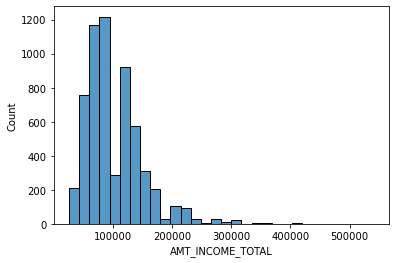

In [22]:
## 100,000 이하 대출자에 대한 수입에 대한 분류
sns.histplot(data=credit_amt_10, x='AMT_INCOME_TOTAL', bins = 30)

In [23]:
df_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

ratio = [0.919271, 0.080729]
labels = ['Loan repayment possible', 'Loan repayment impossible']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 타켓 분포확인 unbalance 문제 해결

### 가설 이야기 


### 성능지표

## 각 조건별로 데이터 확인해보기

### 소득분위별 데이터 확인

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

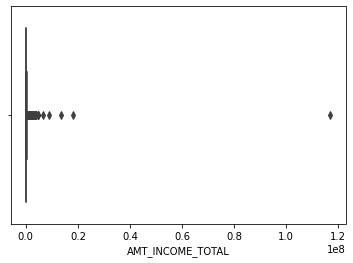

In [24]:
## 소득별 정리

sns.boxplot(df_train['AMT_INCOME_TOTAL'])

In [25]:
## 소득분위를 보기 위한 데이터 셋 
# train data
df_age = df_train

In [26]:
## 소득별로 5분위로 나누기
df_age['income_rank'] = pd.qcut(df_age['AMT_INCOME_TOTAL'], q=[0,.2,.4,.6,.8,1.], labels=range(1,6))

In [27]:
df_age.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,4
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2


<AxesSubplot:xlabel='income_rank', ylabel='Count'>

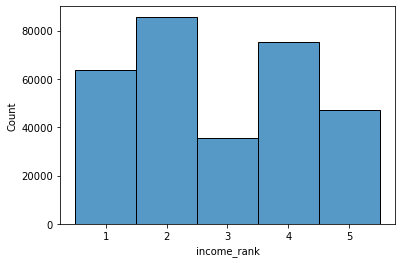

In [28]:
## 소득분위별 분포 확인
sns.histplot(data=df_age, x='income_rank', bins=40)

In [ ]:
sns.histplot(data=df_age, x='income_rank', bins=40)

In [29]:
## 소득분위별 상환율 확인
print(df_age.groupby(['income_rank'])['TARGET'].value_counts(normalize=True))

income_rank  TARGET
1            0         0.917938
             1         0.082062
2            0         0.914117
             1         0.085883
3            0         0.913153
             1         0.086847
4            0         0.919431
             1         0.080569
5            0         0.934802
             1         0.065198
Name: TARGET, dtype: float64


#### 소득별로  해석  
* 가장 소득이 높은 구간 이외에 상환율의 차이는 없었다. 
* 소득에 따른 상환여부를 판단하는 건 크게 의미가 없었다. 



### 연령별로 확인 


In [30]:
df_age['age'] = df_age['DAYS_BIRTH']/365*-1
df_age

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3,25.553425
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,56.917808
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,3,41.002740
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,32.769863


In [31]:
## 연령별 소득확인해보기
print(df_age.groupby(['age'])['AMT_INCOME_TOTAL'].value_counts(normalize=True))

age        AMT_INCOME_TOTAL
20.517808  112500.0            1.000000
21.021918  90000.0             1.000000
21.030137  112500.0            0.500000
           178447.5            0.500000
21.035616  72000.0             0.333333
                                 ...   
69.032877  112500.0            0.500000
69.041096  202500.0            1.000000
69.043836  61830.0             0.500000
           180000.0            0.500000
69.120548  450000.0            1.000000
Name: AMT_INCOME_TOTAL, Length: 202219, dtype: float64


In [32]:
## 나이대 별로 정리
age = df_age['age']
age_group = np.trunc(age)
df_age['age_group'] = age_group
df_age


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548,25.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,5,45.931507,45.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.180822,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,52.068493,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2,54.608219,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,25.553425,25.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,56.917808,56.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,3,41.002740,41.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,4,32.769863,32.0


In [33]:
## age 확인
df_age['age'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: age, dtype: float64

In [34]:
## 20~60대까지로 변환 
bins =[20,30,40,50,60,70]
labels = [20,30,40,50,60]

df_age['age_group'] = pd.cut(df_age["age"], bins = bins, labels = labels)


# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([21,22,23,24,25,26,27,28,29], 20)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([31,32,33,34,35,36,37,38,39], 30)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([41,42,43,44,45,46,47,48,49], 40)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([51,52,53,54,55,56,57,58,59], 50)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([61,62,63,64,65,66,67,68,69], 60)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([71,72,73,74,75,76,77,78,79], 70)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([81,82,83,84,85,86,87,88,89], 80)
# df_fin['AGE_EDIT'] = df_fin['AGE_EDIT'].replace([91,92,93,94,95,96,97,98,99], 90)
# df_fin['AGE_EDIT'].astype(int)


In [35]:
## 연령대별 소득확인해보기
print(df_age.groupby(['age_group'])['AMT_INCOME_TOTAL'].value_counts(normalize=True))

age_group  AMT_INCOME_TOTAL
20         135000.0            0.129851
           112500.0            0.122121
           157500.0            0.096821
           180000.0            0.083517
           90000.0             0.082317
                                 ...   
60         886500.0            0.000028
           990000.0            0.000028
           1260000.0           0.000028
           1291500.0           0.000028
           2250000.0           0.000028
Name: AMT_INCOME_TOTAL, Length: 4189, dtype: float64


In [36]:
## 연령대별 평균 수입
print(df_age.groupby(['age_group'])['AMT_INCOME_TOTAL'].mean())

age_group
20    159520.624754
30    178888.784549
40    180565.509225
50    165128.297171
60    138897.496600
Name: AMT_INCOME_TOTAL, dtype: float64


#### 연령대별로도 해석하기

In [37]:
### 연령별 상환율 차이

age_target_rate = df_age.groupby(['age_group'])['TARGET'].value_counts(normalize=True)
age_target_rate

age_group  TARGET
20         0         0.885431
           1         0.114569
30         0         0.904165
           1         0.095835
40         0         0.923492
           1         0.076508
50         0         0.938703
           1         0.061297
60         0         0.950786
           1         0.049214
Name: TARGET, dtype: float64

####  해석 : 
* 연령별 상환율을 봤을 때, 20,30대의 상환율이 평균보다 2~3%가량 떨어졌다.

### 소득별, 연령별 타켓분포 확인

In [38]:
## 소득분위별 연령별 target 분포 확인
predict_income_age_target = df_age.groupby(['income_rank','age_group'])['TARGET'].value_counts(normalize=True)
predict_income_age_target

income_rank  age_group  TARGET
1            20         0         0.872648
                        1         0.127352
             30         0         0.891724
                        1         0.108276
             40         0         0.917444
                        1         0.082556
             50         0         0.942062
                        1         0.057938
             60         0         0.950395
                        1         0.049605
2            20         0         0.876351
                        1         0.123649
             30         0         0.898935
                        1         0.101065
             40         0         0.919001
                        1         0.080999
             50         0         0.936548
                        1         0.063452
             60         0         0.950638
                        1         0.049362
3            20         0         0.880092
                        1         0.119908
             30        

#### 해석
* 가장 높은 소득 분위를 제외하고, 각 소득 분위별로 소득이 적을수록 20,30대의 상환율이 평균 상환율보다 떨어졌다. 

### 소득분위별 수입과 대출액 확인

In [39]:
## 소득분위 연령별 평균 수입

income_mean = df_age.groupby(['income_rank','age_group'])['AMT_INCOME_TOTAL'].mean()
income_mean

income_rank  age_group
1            20            80813.319712
             30            79972.815711
             40            79508.080392
             50            76715.372636
             60            74119.951394
2            20           122703.380549
             30           123583.547887
             40           123515.130438
             50           122732.099155
             60           121779.895192
3            20           155445.727385
             30           155635.981793
             40           155699.790554
             50           154990.720999
             60           154936.774609
4            20           197569.325026
             30           199030.463922
             40           199380.155476
             50           198539.228201
             60           196888.273667
5            20           323816.697423
             30           344614.140255
             40           340844.334269
             50           333703.389756
             60  

In [40]:
## 분위별 연령별 평균 대출액
credit_mean = df_age.groupby(['income_rank','age_group'])['AMT_CREDIT'].mean()
credit_mean

income_rank  age_group
1            20           317216.086942
             30           387008.043079
             40           424254.021969
             50           421728.701460
             60           355995.798153
2            20           410438.360973
             30           505007.423833
             40           559065.652339
             50           569136.446444
             60           492834.848303
3            20           498080.782843
             30           586660.364140
             40           645261.738510
             50           654297.527447
             60           591317.907667
4            20           579677.405531
             30           674817.764622
             40           728883.099445
             50           759237.002231
             60           687561.782797
5            20           745519.870955
             30           850826.637298
             40           914645.590212
             50           951043.429876
             60  

In [41]:
## 대출 금액/소득금액  
income_credit_ratio = credit_mean/income_mean
income_credit_ratio

income_rank  age_group
1            20           3.925295
             30           4.839245
             40           5.335986
             50           5.497317
             60           4.802969
2            20           3.344964
             30           4.086365
             40           4.526293
             50           4.637226
             60           4.046931
3            20           3.204210
             30           3.769439
             40           4.144269
             50           4.221527
             60           3.816511
4            20           2.934046
             30           3.390525
             40           3.655745
             50           3.824116
             60           3.492142
5            20           2.302290
             30           2.468925
             40           2.683470
             50           2.849966
             60           2.851680
dtype: float64

In [42]:
### 소득분위 낮은 사람들 중 연령분포 확인
incomerank_age_rate = df_age.groupby(['income_rank'])['age_group'].value_counts(normalize=True)
incomerank_age_rate

income_rank  age_group
1            50           0.243156
             30           0.217289
             40           0.203751
             60           0.194720
             20           0.141085
2            30           0.261568
             40           0.234806
             50           0.217408
             20           0.168338
             60           0.117881
3            30           0.274674
             40           0.243026
             50           0.217866
             20           0.159958
             60           0.104476
4            30           0.289354
             40           0.272059
             50           0.213698
             20           0.142214
             60           0.082675
5            30           0.306762
             40           0.302899
             50           0.213825
             20           0.110191
             60           0.066323
Name: age_group, dtype: float64

In [43]:
### 소득분위별 수입유형분포
incomerank_age_rate = df_age.groupby(['income_rank'])['NAME_INCOME_TYPE'].value_counts(normalize=True)
incomerank_age_rate

income_rank  NAME_INCOME_TYPE    
1            Working                 0.509243
             Pensioner               0.314240
             Commercial associate    0.117290
             State servant           0.058912
             Unemployed              0.000220
             Maternity leave         0.000047
             Student                 0.000047
2            Working                 0.555844
             Commercial associate    0.197992
             Pensioner               0.183556
             State servant           0.062503
             Student                 0.000047
             Unemployed              0.000047
             Maternity leave         0.000012
3            Working                 0.539588
             Commercial associate    0.228105
             Pensioner               0.160297
             State servant           0.071898
             Student                 0.000113
4            Working                 0.516348
             Commercial associate    0.282044


In [44]:
#### 연령별, 노동유형별, 직장유형 확인
incomerank_age_rate = df_age.groupby(['age_group'])['NAME_INCOME_TYPE'].value_counts(normalize=True)
incomerank_age_rate

age_group  NAME_INCOME_TYPE    
20         Working                 0.626086
           Commercial associate    0.298483
           State servant           0.072277
           Pensioner               0.002932
           Unemployed              0.000089
           Student                 0.000067
           Businessman             0.000044
           Maternity leave         0.000022
30         Working                 0.630048
           Commercial associate    0.278187
           State servant           0.085545
           Pensioner               0.006050
           Student                 0.000085
           Unemployed              0.000049
           Maternity leave         0.000024
           Businessman             0.000012
40         Working                 0.614755
           Commercial associate    0.275643
           State servant           0.085693
           Pensioner               0.023726
           Unemployed              0.000105
           Student                 0.000039


In [45]:
## 20~30대 그룹화
age_group_2030 = df_age[df_age['age_group'] == 20 | 30]



In [46]:
## 소득 1,2분위 그룹
income_rank_12 = df_age[df_age['income_rank']==1 | 2]


In [47]:
## 20대, 1분위 그룹
age_20_income_rank_1 = df_age[(df_age['age_group'] == 20) & (df_age['income_rank'] == 1)]

In [48]:
age_20_income_rank_1['TARGET'].value_counts(normalize=True)

0    0.872648
1    0.127352
Name: TARGET, dtype: float64

#### 해석 : 
* 연령별, 소득별로 수입, 대출액, 직장유형, 연령분포 등을 확인하였고, 그에 따른 별다른 인사이트는 없었다. 
* 낮은 대출액을 가진 사람 중에, 연금 생활자의 비율이 높다. 


### 대출액과 수입액을 따른 상환율 분포 확인

#### 100,000이하 대출액 대출자

In [49]:
## 100,000이하 대출액 대출자
credit_amt_10 = df_train[df_train['AMT_CREDIT'] <= 100000]
credit_amt_10['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

count     6004.000000
mean     75231.710526
std      16966.541306
min      45000.000000
25%      61128.000000
50%      76410.000000
75%      90000.000000
max      99576.000000
Name: AMT_CREDIT, dtype: object

In [50]:
## 100,000이하 대출자 수입 평균
credit_amt_10['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count      6004.000000
mean     102340.480263
std       49785.020040
min       26100.000000
25%       67500.000000
50%       90000.000000
75%      126000.000000
max      540000.000000
Name: AMT_INCOME_TOTAL, dtype: object

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

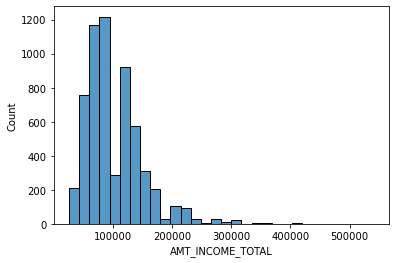

In [51]:
## 100,000 이하 대출자에 대한 수입에 대한 분류
sns.histplot(data=credit_amt_10, x='AMT_INCOME_TOTAL', bins = 30)

In [52]:
# $100,000이하 대출자의 수입 대비 대출액 비율
credit_amt_10['ratio'] = credit_amt_10['AMT_CREDIT'] / credit_amt_10['AMT_INCOME_TOTAL'] * 100
credit_amt_10['ratio'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    6004.000000
mean       89.308316
std        45.303157
min         8.333333
25%        56.600000
50%        80.000000
75%       110.740417
max       355.333333
Name: ratio, dtype: float64

In [53]:
## 전체평균 수입대비 대출액 395%수준
total_rate = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL'] * 100
total_rate.describe()

count    307511.000000
mean        395.757024
std         268.972819
min           0.480762
25%         201.866667
50%         326.506667
75%         515.988000
max        8473.684211
dtype: float64

#### 50,000 이하의 대출자



In [54]:
credit_amt_5 = df_train[df_train['AMT_CREDIT'] <= 50000]

In [55]:
## 수입확인
credit_amt_5['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       561.000000
mean      95068.315508
std       51411.618943
min       27000.000000
25%       67500.000000
50%       85500.000000
75%      112500.000000
max      540000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [56]:
## 소득대비대출비율

credit_amt_5['ratio'] = credit_amt_5['AMT_CREDIT'] / credit_amt_5['AMT_INCOME_TOTAL'] * 100
credit_amt_5['ratio'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    561.000000
mean      61.782275
std       28.800633
min        8.333333
25%       40.000000
50%       55.555556
75%       73.706667
max      167.874016
Name: ratio, dtype: float64

In [57]:
## 데이터 샘플의 수
credit_amt_10.shape, credit_amt_5.shape, df_train.shape

((6004, 126), (561, 126), (307511, 125))

In [58]:
## 상환 여부 비교
print('$50,000이하 대출자들 상환비율\n', 
      credit_amt_5['TARGET'].value_counts(normalize=True))

print('$100,000이하 대출자들 상환비율\n', 
      credit_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $50,000이하 대출자들 상환비율
 0    0.959002
1    0.040998
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.94487
1    0.05513
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


#### 소득 대출 상환 비율
* 전체 대출액 395%, 100,000이하 대출자 89%,  50,000 이하 61%로 나타났다.
* 대출액이 낮을수록 소득대비대출비율이 낮다.
* 전체데이터 대비 '대출액 100,000이하 대출자들 상환비율이 약 2.5%, 50,000이하 대출자들 상환비율이 약 4% 높았다'


#### 100,000이하 수입있는 대출자

In [60]:
## $100,000 수입있는 대출자 확인
income_amt_10 = df_train[df_train['AMT_INCOME_TOTAL'] <= 100000]
income_amt_10['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count    63698.000000
mean     78074.093642
std      15363.678118
min      25650.000000
25%      67500.000000
50%      81000.000000
75%      90000.000000
max      99900.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [61]:
## $100,000이하 수입있는 대출자 대출금 확인
income_amt_10['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

count      63698.000000
mean      387216.145248
std       270024.339152
min        45000.000000
25%       193500.000000
50%       284400.000000
75%       528633.000000
max      2517300.000000
Name: AMT_CREDIT, dtype: object

In [62]:
# $100,000이하 수입을 가진 대출자의 소득 대비 대출 비율
income_amt_10['ratio'] = income_amt_10['AMT_CREDIT'] / income_amt_10['AMT_INCOME_TOTAL'] * 100


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='ratio', ylabel='Count'>

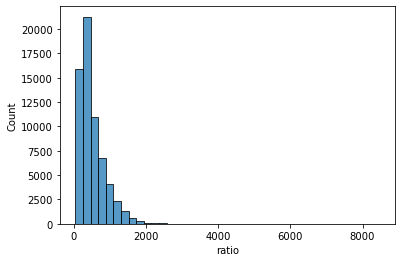

In [63]:
sns.histplot(data=income_amt_10, x = 'ratio' , bins=40)

In [64]:
## $100,000 이하의 대출자의 평균 수입 대비 대출액은 500% 수준이다.
income_amt_10['ratio'].describe()

count    63698.000000
mean       507.177112
std        362.726726
min         45.454545
25%        257.272727
50%        384.615385
75%        672.211111
max       8473.684211
Name: ratio, dtype: float64

In [65]:
## 전체평균 수입대비 대출액 395%수준
total_rate = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL'] * 100
total_rate.describe()

count    307511.000000
mean        395.757024
std         268.972819
min           0.480762
25%         201.866667
50%         326.506667
75%         515.988000
max        8473.684211
dtype: float64

In [66]:
## $50,000 이하의 대출 정보만 본다. 696%수준
income_amt_5 = df_train[df_train['AMT_INCOME_TOTAL'] <= 50000]
income_amt_5['ratio'] = income_amt_5['AMT_CREDIT'] / income_amt_5['AMT_INCOME_TOTAL'] * 100
income_amt_5['ratio'].describe()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    4517.000000
mean      696.757535
std       543.298104
min        90.909091
25%       308.727273
50%       545.454545
75%       902.857143
max      8473.684211
Name: ratio, dtype: float64

In [67]:
## 데이터 샘플의 수
income_amt_10.shape, income_amt_5.shape, df_train.shape

((63698, 126), (4517, 126), (307511, 125))

In [68]:
income_amt_5.shape

(4517, 126)

In [69]:
## 상환 여부 비교
print('수입 $50,000이하 대출자들 상환비율\n', 
      income_amt_5['TARGET'].value_counts(normalize=True))

print('수입 $100,000이하 대출자들 상환비율\n', 
      income_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $50,000이하 대출자들 상환비율
 0    0.924065
1    0.075935
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.917972
1    0.082028
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [70]:
income_amt_3 = df_train[df_train['AMT_INCOME_TOTAL'] <= 30000]
income_amt_3['ratio'] = income_amt_3['AMT_CREDIT'] / income_amt_3['AMT_INCOME_TOTAL'] * 100
income_amt_3['ratio'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count     141.000000
mean     1022.726185
std       964.301441
min       153.846154
25%       484.533333
50%       769.230769
75%      1229.283990
max      8473.684211
Name: ratio, dtype: float64

In [71]:
income_amt_3.shape

(141, 126)

In [72]:
## $40,000 이하의 대출 정보만 본다. 696%수준
income_amt_4 = df_train[df_train['AMT_INCOME_TOTAL'] <= 40000]
income_amt_4['ratio'] = income_amt_4['AMT_CREDIT'] / income_amt_4['AMT_INCOME_TOTAL'] * 100
income_amt_4['ratio'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count     963.000000
mean      848.407118
std       668.460806
min       121.951220
25%       375.000000
50%       690.800000
75%      1061.150000
max      8473.684211
Name: ratio, dtype: float64

In [73]:
income_amt_4.shape

(963, 126)

In [74]:
## 상환 여부 비교

print('수입 $30,000이하 대출자들 상환비율\n', 
      income_amt_3['TARGET'].value_counts(normalize=True))
print('수입 $40,000이하 대출자들 상환비율\n', 
      income_amt_4['TARGET'].value_counts(normalize=True))

print('수입 $50,000이하 대출자들 상환비율\n', 
      income_amt_5['TARGET'].value_counts(normalize=True))

print('수입 $100,000이하 대출자들 상환비율\n', 
      income_amt_10['TARGET'].value_counts(normalize=True))

print('전체 대출자들 상환비율\n', df_train['TARGET'].value_counts(normalize=True))

수입 $30,000이하 대출자들 상환비율
 0    0.943262
1    0.056738
Name: TARGET, dtype: float64
수입 $40,000이하 대출자들 상환비율
 0    0.916926
1    0.083074
Name: TARGET, dtype: float64
수입 $50,000이하 대출자들 상환비율
 0    0.924065
1    0.075935
Name: TARGET, dtype: float64
수입 $100,000이하 대출자들 상환비율
 0    0.917972
1    0.082028
Name: TARGET, dtype: float64
전체 대출자들 상환비율
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


#### 수입액에 따른 상환율이 변화
* 수입 100,000 이하에서는 어떤 특별한 경향성을 찾기 어려웠다. 

####  해석
* 대출액은 낮은 사람들이 상환율이 높다.
* 소득액에 따른 상환율이 일정한 경향성을 띠지 않았다. 
* 소득액에 따른 상환율이 변화보다는, 대출액 자체에 대한 상환율이 변화가 있었다. 


# 정책실험 당사자 연령별 확인



##  기본금융을 아이디어로 구체화 해보기
* 조건
* 1000만원 이하 한도 내 대출을 3%이하 이자로 빌리는 것 가능!
* 만25,26세 or 결혼 적령기 (남성 만 33,34세, 여성 만 29~30세) 시범 운용!

#### 기본적인 값들 구해보기! 
* 소득분위 낮은 1분위/20~30대 => 5개 단계, 10단계, 20단계 나눠보면 어떨까? 
* 평균 소득, 
* 평균 대출액, 
* 평균 월 납입액, 
* 상환 여부


### 기본대출 예상대상자 정보확인

#### 25~26세 대상자

In [76]:
## 만 25~26세만 뽑아보기
age_2526 = df_age[(df_age['age']>=25) & (df_age['age']<27)]
age_2526

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,4,25.920548,20
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,26.783562,20
44,100051,0,Cash loans,M,N,Y,0,202500.0,661702.5,48280.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,4,26.923288,20
77,100089,0,Cash loans,M,N,Y,0,135000.0,337761.0,15781.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,2,26.482192,20
101,100120,0,Cash loans,F,N,N,0,135000.0,781920.0,28215.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2,26.438356,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307244,455953,0,Cash loans,F,Y,N,0,117000.0,135000.0,9823.5,...,0,1.0,1.0,0.0,0.0,0.0,4.0,2,26.295890,20
307268,455985,1,Cash loans,M,N,N,0,135000.0,355536.0,19417.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,25.123288,20
307396,456129,0,Cash loans,M,N,Y,0,135000.0,298512.0,29655.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,2,25.997260,20
307468,456208,0,Cash loans,F,N,Y,1,135000.0,305955.0,21888.0,...,0,0.0,0.0,0.0,0.0,1.0,2.0,2,26.969863,20


In [77]:
## 평균 대출액
age_2526['AMT_CREDIT'].describe().apply(lambda x: format(x,'f'))

count       8729.000000
mean      481022.618513
std       351674.015093
min        45000.000000
25%       226422.000000
50%       381528.000000
75%       618840.000000
max      2925000.000000
Name: AMT_CREDIT, dtype: object

In [78]:
age_2526['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x,'f'))

count       8729.000000
mean      160250.510270
std        79144.711033
min        27000.000000
25%       112500.000000
50%       135000.000000
75%       189000.000000
max      1800000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [79]:
## 수입 대비 대출액 비율 # 319% 수준
age_2526['ratio'] = age_2526['AMT_CREDIT'] / age_2526['AMT_INCOME_TOTAL'] * 100
age_2526['ratio'].describe()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    8729.000000
mean      319.758171
std       215.786384
min        14.285714
25%       170.484615
50%       266.666667
75%       403.733333
max      3669.230769
Name: ratio, dtype: float64

In [80]:
## age_2526의 타켓 분포 
age_2526['TARGET'].value_counts(normalize=True)

0    0.897354
1    0.102646
Name: TARGET, dtype: float64

#### 해석:

* 25~26세의 대상자들의 상환율의 전체 대상자의 평균 상환율보다, 2%가량 떨어지는 것을 확인할 수 있다. 

In [81]:
## 수입이 50,000 이하 
income_2526_5 = age_2526[age_2526['AMT_INCOME_TOTAL'] <= 50000]
income_2526_5['ratio'] = income_2526_5['AMT_CREDIT'] / income_2526_5['AMT_INCOME_TOTAL'] * 100
income_2526_5['ratio'].describe()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count      57.000000
mean      500.962635
std       279.284151
min       106.600000
25%       318.181818
50%       450.000000
75%       632.000000
max      1901.960000
Name: ratio, dtype: float64

In [82]:
## age_2526의 타켓 분포 
income_2526_5['TARGET'].value_counts(normalize=True)

0    0.894737
1    0.105263
Name: TARGET, dtype: float64

In [83]:
## 대출액이 50,000 이하 
credit_2526_5 = age_2526[age_2526['AMT_CREDIT'] <= 50000]
credit_2526_5['ratio'] = credit_2526_5['AMT_CREDIT'] / credit_2526_5['AMT_INCOME_TOTAL'] * 100
credit_2526_5['ratio'].describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count     29.000000
mean      43.948251
std       19.597197
min       14.285714
25%       30.457143
50%       40.000000
75%       53.300000
max      106.600000
Name: ratio, dtype: float64

In [84]:
## 대출액 50,000 이하 분포
credit_2526_5['TARGET'].value_counts(normalize=True)

0    0.896552
1    0.103448
Name: TARGET, dtype: float64

#### 해석:
* 소득액과 대출액에 따른상환율의 변화가 크지 않은 것을 알 수 있다. 

#### 결혼 적령기의 남성, 여성의 정보확인

In [85]:
## 남성 만33~34세
age_male = df_age[(df_age['age']>=33) & (df_age['age']<35) & (df_age['CODE_GENDER']=='M')]
age_male

## 여성 만29~30세
age_female = df_age[(df_age['age']>=29) & (df_age['age']<31) & (df_age['CODE_GENDER']=='F')]
age_female


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_rank,age,age_group
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,0,0.0,0.0,0.0,0.0,0.0,5.0,5,30.536986,30
31,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0,0.0,0.0,0.0,0.0,2.0,5.0,2,30.531507,30
96,100114,0,Cash loans,F,N,Y,0,135000.0,284400.0,22599.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,2,29.408219,20
100,100119,0,Revolving loans,F,N,Y,0,54000.0,180000.0,9000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.526027,30
103,100122,0,Cash loans,F,N,N,1,76500.0,808650.0,26217.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.010959,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307412,456145,0,Cash loans,F,N,N,0,162000.0,900000.0,29034.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,3,29.019178,20
307436,456174,0,Cash loans,F,N,N,2,135000.0,215640.0,17064.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2,30.887671,30
307447,456185,0,Cash loans,F,N,Y,0,135000.0,528633.0,22527.0,...,0,0.0,0.0,0.0,0.0,1.0,3.0,2,30.665753,30
307453,456192,0,Cash loans,F,N,N,1,135000.0,450000.0,24412.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,2,30.904110,30


In [86]:
## 남성이 상환이 조금 떨어지는 형태
age_male['TARGET'].value_counts(normalize=True)

0    0.881746
1    0.118254
Name: TARGET, dtype: float64

In [87]:
## 여성은 비슷한 수준 
age_female['TARGET'].value_counts(normalize=True)

0    0.897167
1    0.102833
Name: TARGET, dtype: float64

#### 해석 : 
* 남성 대상자, 3%가량 떨어지고, 여성 대상자는 2%가량 상환율이 떨어지는 것을 알 수 있다.
* 대상자의 범위와 수에 따라 손실액을 추정해볼 수 있다. 

# object feature들을 인코딩

In [88]:
# ## object feature들을 label encoding
# object_columns = df_fin.dtypes[df_fin.dtypes == 'object'].index.tolist()
# object_columns

# ## 카테고리 칼럼 인코딩
# df_fin['CODE_GENDER'] = pd.factorize(df_fin['CODE_GENDER'])[0] ## ?

# ## for문으로 object 모두 변환
# for column in object_columns:
#     df_fin[column] = pd.factorize(df_fin[column])[0]

# ## 결측치 확인
# df_fin.isnull().sum().head(100)    

# ## 카테고리 타입을 int 타입으로 변환
# df_fin['income_rank'] = df_fin['income_rank'].astype(int)

# 모델 만들기! 


In [89]:
## 칼럼 수 확인
prev_df.shape

(1670214, 37)

In [90]:
## null값 많이 포함된 칼럼 삭제
prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [91]:
## 결측치가 80%이상인 칼럼 삭제
prev_df_column_lists = prev_df.columns.tolist()

for column in prev_df_column_lists:
    if prev_df[column].isnull().sum() / prev_df.shape[0] >= 0.8:
      prev_df = prev_df.drop(columns=[column], axis=1)


In [92]:
prev_df.shape

(1670214, 35)

### null값의 비율이 90% 이상인 컬럼 두 개, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED 삭제

In [93]:
prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY     

## 상관관계 높은 칼럼 삭제

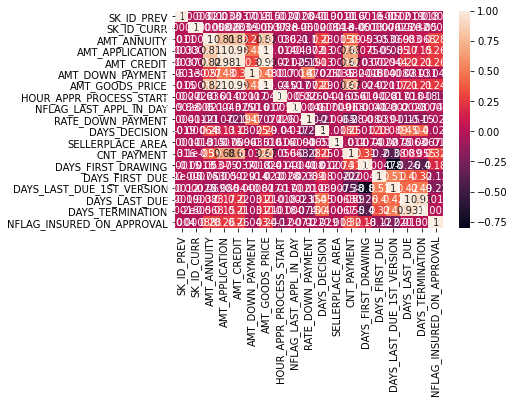

In [94]:
# 숫자형 칼럼 간 correlation 파악하기
# float, int 컬럼만 사용
corrMatrix = prev_df.select_dtypes(include=['float64', 'int64']).corr()
# sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [95]:
## # heatmat의 윗 부분만 선택
upper= corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# threshold 0.9 이상 컬럼은 삭제
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

prev_df.drop(to_drop, axis=1, inplace=True)

In [96]:
prev_df.shape

(1670214, 32)

#### correlation, null값 비율에 따라 컬럼 5개가 삭제됐다.

## 중복되는 칼럼 찾기! 

In [97]:
## 중복 칼럼
columns_list_prev = prev_df.columns.tolist()
columns_list_train = df_train.columns.tolist()

In [98]:
columns_list_prev

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'NFLAG_INSURED_ON_APPROVAL']

In [99]:
## 중복칼럼
redundant_cols = []

for col in columns_list_prev:
    if col in columns_list_train:
        redundant_cols.append(col)
        


In [100]:
redundant_cols 


['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

In [101]:
## id 칼럼 제외하고 중복 칼럼
redundant_cols = redundant_cols[1:]

## 새로운 칼럼이름 설정
new_cols_name = []

for col in redundant_cols:
    new_cols_name.append(f'{col}_prev')

new_cols_name


['NAME_CONTRACT_TYPE_prev',
 'AMT_ANNUITY_prev',
 'WEEKDAY_APPR_PROCESS_START_prev',
 'HOUR_APPR_PROCESS_START_prev',
 'NAME_TYPE_SUITE_prev']

In [102]:
## 원래 이름과 바꿀 이름 
dict_list = dict(zip(redundant_cols, new_cols_name))
print(dict_list)

{'NAME_CONTRACT_TYPE': 'NAME_CONTRACT_TYPE_prev', 'AMT_ANNUITY': 'AMT_ANNUITY_prev', 'WEEKDAY_APPR_PROCESS_START': 'WEEKDAY_APPR_PROCESS_START_prev', 'HOUR_APPR_PROCESS_START': 'HOUR_APPR_PROCESS_START_prev', 'NAME_TYPE_SUITE': 'NAME_TYPE_SUITE_prev'}


In [103]:
## prev_df 
prev_df.rename(columns=dict_list, inplace=True)
prev_df.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,NaN,SATURDAY,8,Y,1,...,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,NaN,MONDAY,7,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,NaN,MONDAY,15,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,NaN,SATURDAY,15,Y,1,...,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN


In [ ]:
prev_df.shape

### 데이터 합치기


In [104]:
avg_prev = prev_df.groupby('SK_ID_CURR').mean()
cnt_prev = prev_df[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']
prev_df = avg_prev

In [105]:
## 데이터 합치기!
merged_df = df_age.merge(prev_df, on='SK_ID_CURR', how='inner')


In [106]:
merged_df.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,nb_app
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,-606.000000,500.000000,24.000000,365243.000000,-565.000000,125.000000,-25.000000,0.000000,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.050030,-1305.000000,533.000000,10.000000,365243.000000,-1274.333333,-1004.333333,-1054.333333,0.666667,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.212008,-815.000000,30.000000,4.000000,365243.000000,-784.000000,-694.000000,-724.000000,0.000000,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.163412,-272.444444,894.222222,23.000000,365243.000000,91066.500000,91584.000000,182477.500000,0.000000,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.159516,-1222.833333,409.166667,20.666667,365243.000000,-1263.200000,-837.200000,72136.200000,0.600000,6
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.073051,-1192.000000,73.000000,14.000000,365243.000000,-1434.500000,-1044.500000,-1209.500000,0.250000,5
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.126602,-719.285714,170.000000,8.000000,365243.000000,-688.285714,-478.285714,51666.857143,0.000000,7
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.000000,-1070.000000,8636.000000,10.000000,365243.000000,-1039.000000,-769.000000,-769.000000,0.000000,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.050005,-1784.500000,342.250000,14.000000,242736.333333,-1955.000000,120935.666667,-1231.000000,0.666667,4
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.000000,-779.750000,9.750000,18.000000,365243.000000,-973.333333,-463.333333,-563.333333,0.666667,4


### 상관관계 높은 칼럼 삭제

In [107]:
## merged 데이터 확인
merged_df.shape
merged_df.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
                              ...   
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
NFLAG_INSURED_ON_APPROVAL    float64
nb_app                         int64
Length: 140, dtype: object

In [108]:
## target 컬럼 타입 변경
merged_df.TARGET.apply(str) # 컬럼 타입 변경

0         1
1         0
2         0
3         0
4         0
         ..
291052    0
291053    0
291054    0
291055    1
291056    0
Name: TARGET, Length: 291057, dtype: object

In [109]:
## 상관관계 높은 칼럼 삭제
corrMatrix_merged = merged_df.select_dtypes(include=['float64','int64']).corr()



In [110]:
## heatmat의 윗 부분만 삭제
upper= corrMatrix_merged.where(np.triu(np.ones(corrMatrix_merged.shape), k=1).astype(np.bool))

# threshold 0.9 이상 컬럼은 삭제
to_drop = [column for column in upper.columns if any(upper[column] > 0.9) ]

merged_df.drop(to_drop, axis=1, inplace=True)

In [111]:
merged_df.shape

(291057, 106)

In [112]:
merged_df = merged_df[:50000]

In [113]:
merged_df.shape

(50000, 106)

### 34개 칼럼 삭제 

# 모델

## One Hot Encoder with og labels

In [114]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(handle_unknown='ignore')
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

In [115]:
# ohe = OneHotEncoder()

## factorize 사용

In [116]:
df_train = df_train[:50000]

In [117]:
categorical_feats = [
    f for f in df_train.columns if df_train[f].dtype == 'object'
]

for f_ in categorical_feats:
    df_train[f_], indexer = pd.factorize(df_train[f_])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [270]:
categorical_feats = [
    f for f in merged_df.columns if merged_df[f].dtype == 'object'
]

for f_ in categorical_feats:
    merged_df[f_], indexer = pd.factorize(merged_df[f_])

In [119]:
## 데이터 분류, train, val 셋으로
train, val = train_test_split(df_train, test_size = 0.2, random_state=21)

train.shape, val.shape

((40000, 125), (10000, 125))

In [120]:
X_train = train.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
y_train = train['TARGET']

X_val = val.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
y_val = val['TARGET']

X_train.shape, y_train.shape, X_val.shape, y_val.shape


((40000, 123), (40000,), (10000, 123), (10000,))

In [121]:
# 컬럼 이름 저장
feature_names = df_train.columns.values.tolist()

In [122]:
feature_names

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [123]:
feature_names = feature_names[2:] # id, target 삭제

## dummy classifier 모델 사용해보기

In [124]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='stratified')
cross_val_score(dummy, X_train, y_train, scoring='roc_auc', cv=3, n_jobs=-1)

array([0.5014306 , 0.50380775, 0.49941386])

In [125]:
cross_val_score(dummy, X_train, y_train, scoring='f1', cv=3, n_jobs=-1)

array([0.07067462, 0.07649254, 0.09389671])

기본모델의 성능이 굉장히 떨어진다. 

## 랜덤 포레스트 모델로 기본모델

In [126]:
## 랜덤 포레스트 분류모델 만들기
pipe = make_pipeline(
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

# rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)

In [127]:
# X_train = ohe.fit_transform(X_train)

In [128]:
# X_val = ohe.transform(X_val)

In [129]:
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [130]:
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))



검증 정확도 0.9188
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9184
           1       1.00      0.00      0.01       816

    accuracy                           0.92     10000
   macro avg       0.96      0.50      0.48     10000
weighted avg       0.93      0.92      0.88     10000



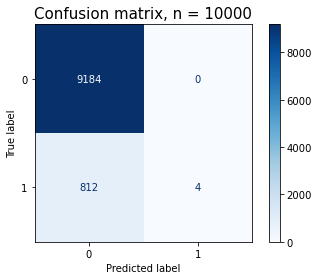

In [131]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

#### 해석 
* 기본모델은 4개를 빼고는 모두 상환가능(0)으로 예측하였기 때문에, 이 부분을 해결할 필요가 있다. 
* 상환어려움(1)에 대한 recall값을 높이는 형태로 성능개선이 필요하다. 

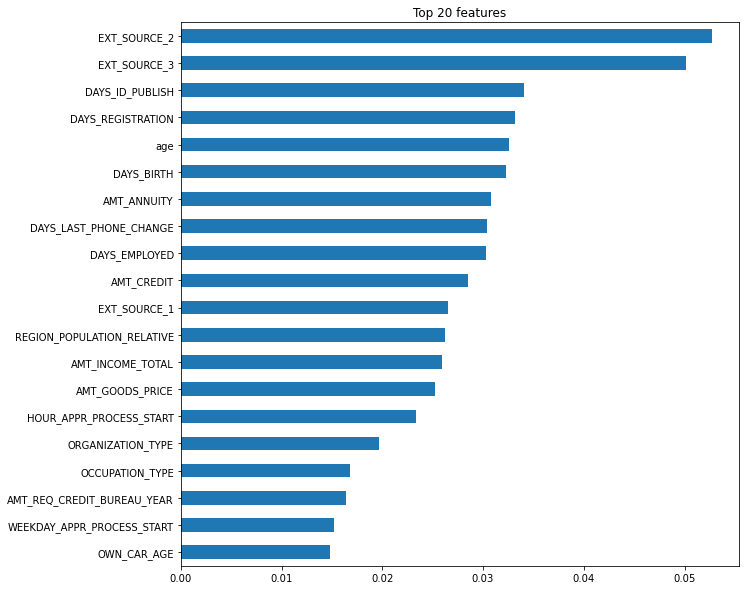

In [132]:
## 특성 중요도
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

### 특성중요도로 확인
#### 특성지표 확인

* 외부 변수 2개 
* 고객이 대출을 신청한 동안에 신분증 문서를 변경한 일수, 신청일 기준
* 고객이 등록서류를 변경한 일 수, 신청일 기준
* 나이, 태어난 날짜!
* 직장에서 일한 일수 
* 폰을 바꾼 마지막 날짜 



#### 경제적 요소
* 매달 내야하는 돈 -
* 대출총액
* 대출받아서 사려고한 상품 총액 -
* 수입 

#### 다른요소
* 사는 지역

####  연령에 따른 것
* 나이, 
* 태어난 날짜!

####  예상 못한 것
* 고객이 대출을 신청한 동안에 신분증 문서를 변경한 일수, 신청일 기준
* 고객이 등록서류를 변경한 일 수, 신청일 기준
* 폰을 바꾼 마지막 날짜 




###  특성들을 따로 뽑아서 모델 만들기

In [133]:
## 따로 컬럼 골라서 모델 만들기

features_to_use = ['CODE_GENDER', 'DAYS_EMPLOYED'\
                  ,'AMT_CREDIT','AMT_ANNUITY', 'AMT_INCOME_TOTAL' , 'NAME_INCOME_TYPE', 'AMT_GOODS_PRICE'\
                  ,'NAME_HOUSING_TYPE', 'age', 'DAYS_BIRTH', 'income_rank', 'REGION_POPULATION_RELATIVE'\
                   ,'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'NAME_CONTRACT_TYPE'\
                  ,'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION'\
                  ]

In [134]:
train_c, val_c = train_test_split(train,  test_size = 0.2, random_state=21)

train_c.shape, val_c.shape

((32000, 125), (8000, 125))

In [135]:
X_train_c = train_c[features_to_use]
y_train_c = train_c['TARGET']
X_val_c = val_c[features_to_use]
y_val_c = val_c['TARGET']

In [136]:
# X_train_c = ohe.fit_transform(X_train_c)

In [137]:
# X_val_c = ohe.transform(X_val_c)

In [138]:
pipe_2 = make_pipeline(
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


In [139]:
pipe_2.fit(X_train_c, y_train_c)
print('검증 정확도', pipe_2.score(X_val_c, y_val_c))

print(classification_report(y_val_c, pipe_2.predict(X_val_c)))


검증 정확도 0.920375
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7363
           1       0.00      0.00      0.00       637

    accuracy                           0.92      8000
   macro avg       0.46      0.50      0.48      8000
weighted avg       0.85      0.92      0.88      8000



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


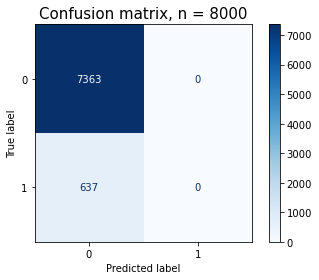

In [140]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_2, X_val_c, y_val_c,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_c)}', fontsize=15)
plt.show()

#### 해석:
* 기본 모델을 만들었지만, 모두 0으로 예측하기 때문에, accuracy 스코어는 높지만, 모델로서 의미가 없다. 

## 불균형 해결법 오버 샘플링 해보기


In [141]:
# df_smote = df_train

In [142]:
# object_columns = df_smote.dtypes[df_smote.dtypes == 'object'].index.tolist()


In [143]:
# for column in object_columns:
#     df_smote[column] = pd.factorize(df_smote[column])[0]

In [144]:
# df_smote.dtypes[df_smote.dtypes == 'category'].index.tolist()

In [145]:
# df_smote['age_group'].astype(int)
# df_smote['income_rank'].astype(int)

In [146]:
# ## 데이터 분류, train, val 셋으로
# smote_train, smote_val = train_test_split(df_smote, test_size = 0.2, random_state=21)

# train.shape, val.shape

In [147]:
# X_smote_train = smote_train.drop('TARGET', axis=1)
# y_smote_train = smote_train['TARGET']

# X_smote_val = smote_val.drop('TARGET', axis=1)
# y_smote_val = smote_val['TARGET']

# X_smote_train.shape, y_smote_train.shape, X_smote_val.shape, y_smote_val.shape

In [148]:
# X_smote_train.info()

In [149]:
# ## simpleimputer를 활용한 nan 값 제거
# imp_smote = SimpleImputer()
# imp_X_train_smote = imp_smote.fit_transform(X_smote_train)

In [150]:
# imp_X_val_smote = imp_smote.transform(X_smote_val)

In [151]:
# df_smote.info()

In [152]:
# smote = SMOTE()
# X_train_over, y_train_over = smote.fit_resample(imp_X_train_smote, imp_X_val_smote)

## 이야기 

In [153]:
# pipe_3 = make_pipeline(
#      OrdinalEncoder(),
#      SimpleImputer(),
#      RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
# )


In [154]:
# pipe_3.fit(X_train_over, y_train_over)
# print('검증 정확도', pipe_2.score(X_val, y_val))

# print(classification_report(y_val, pipe_2.predict(X_val)))

In [155]:
# ## oversampling
# pipe.fit(X_train_over, y_train_over)

# print('검증 정확도', pipe.score(X_val, y_val))

# print(classification_report(y_val, pipe.predict(X_val)))

In [156]:
# fig, ax = plt.subplots()
# pcm = plot_confusion_matrix(pipe, X_val, y_val,
#                             cmap=plt.cm.Blues,
#                             ax=ax);
# plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
# plt.show()

오히려 떨어짐 1.0은 올라갔다. 

## LGBM classifier만들기

In [157]:
## 데이터 셋 나누기 

target = 'TARGET'

df_train.shape


(50000, 125)

In [271]:
## 데이터 분류, train, val 셋으로
train, val = train_test_split(df_train, train_size=0.80, test_size=0.20,stratify=df_train[target], random_state=21)
                              

train.shape, val.shape

X_train = train.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
y_train = train['TARGET']

X_val = val.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
y_val = val['TARGET']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 123), (40000,), (10000, 123), (10000,))

In [160]:
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [161]:
## LGBM 분류기 만들기


clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=500,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?
    silent=-1, #?
    verbose=-1
)

clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.804903	training's binary_logloss: 0.235798	valid_1's auc: 0.764425	valid_1's binary_logloss: 0.252025
[200]	training's auc: 0.853729	training's binary_logloss: 0.218517	valid_1's auc: 0.767622	valid_1's binary_logloss: 0.248289
Early stopping, best iteration is:
[167]	training's auc: 0.839466	training's binary_logloss: 0.223542	valid_1's auc: 0.768015	valid_1's binary_logloss: 0.248863


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=500,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

In [162]:
print('검증 정확도', clf.score(X_val, y_val))

print(classification_report(y_val, clf.predict(X_val)))

검증 정확도 0.9181
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9180
           1       1.00      0.00      0.00       820

    accuracy                           0.92     10000
   macro avg       0.96      0.50      0.48     10000
weighted avg       0.92      0.92      0.88     10000



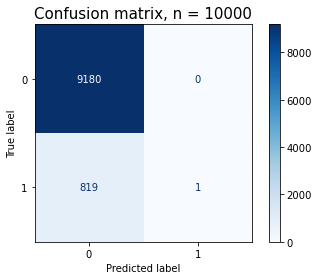

In [163]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

#### 이 모델은 1에 대한 값을 전혀 맞추지 못했다.

In [164]:
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')


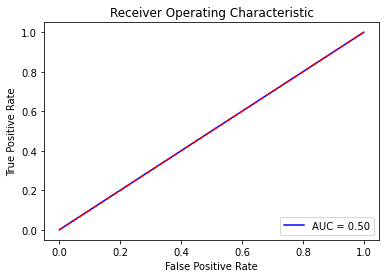

In [165]:
buildROC(y_val, clf.predict(X_val))

#### 해석: 
* 모델 성능 개선이 없었다.

## XGBClassifier 모델 확인

In [166]:
# 모델 소요 시간을 재는 함수
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [167]:
# 타겟 0,1의 비율 저장
vc = y_train.value_counts().tolist()
ratio = float(vc[0]/vc[1])

In [168]:
ratio # 타겟 비율 확인

11.476606363069244

In [169]:
# randomized search에서 사용할 파라미터
params = {
        'min_child_weight': [1, 5, 10], # 과적합,과소적합 조정 파라미터
        'gamma': [0.5, 1, 1.5, 2, 5], # 
        'subsample': [0.6, 0.8, 1.0], # 각 트리별 관측 데이터 샘플링 비율
        'colsample_bytree': [0.6, 0.8, 1.0], # 각 트리별 feature 샘플링 비율
        'max_depth': [3, 4, 5, 7, 10] # tree의 최대 깊이
        }

### parameter 설명
### regularization within tree
- min_child_weight : 트리의 새로운 노드를 만들 때 최소 가중치, 숫자가 작을수록 자식노드가 적은 샘플에 적합해지므로 복잡한 트리를 만들게 되고 과적합되기 쉽다.
- max_depth : 루트부터 마지막 자식 노드까지 있는 총 노드의 갯수로 숫자가 커질 수록 과적합 되기 쉽다.

### regularization across trees
- gamma : regularization parameter, gamma=20인 경우 굉장히 높은 수치, 트리가 깊을 때 높은 gamma 값을 사용한다.

### sampling
- subsample : 각 단계마다 샘플을 얼마나 사용할 것인지를 정하는 것으로 1인 경우 모든 샘플을 사용한다.
- colsample_bytree : 각 단계마다 몇 개의 컬럼을 사용할 것인지 정하는 것으로 1인 경우 모든 컬럼을 사용한다.

In [170]:
# X_train_encoded = ohe.fit_transform(X_train)
# X_val_encoded = ohe.transform(X_val)

In [171]:
# import re

# regex = re.compile(r"\[|\]|<", re.IGNORECASE)

# X_train_encoded.columns = [regex.sub("_", col) 
#                    if any(x in str(col) for x in set(('[', ']', '<'))) 
#                    else col for col in X_train_encoded.columns.values]

In [172]:
xgbc = XGBClassifier(random_state=42,
                    learning_rate=0.2, 
                    tree_method='auto',
                    early_stopping_rounds = 50, # 50번 이상 개선이 없으면 멈춤
                    n_estimator=500,
                    scale_pos_weight=ratio) # imbalanced target을 조정하는데 사용

In [173]:
folds = 2
param_comb = 5 # 반복 수행 횟수

In [174]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgbc, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc', 
                                   cv=skf.split(X_train, y_train), verbose=3, random_state=42 )


In [175]:
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[17:28:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.4s
[17:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.4s
[17:28:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=   4.1s
[17:28:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=   4.0s
[17:28:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.0s
[17:28:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.7s
[17:28:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=   2.4s
[17:28:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/2] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=   2.0s
[17:28:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/2] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.4s
[17:28:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/2] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   2.5s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:28:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, feature_names, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 30.52 seconds.


In [176]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([2.27472198, 3.93626535, 2.2454536 , 2.0638057 , 2.33615911]), 'std_fit_time': array([0.02475393, 0.07442343, 0.34682751, 0.17640531, 0.03237998]), 'mean_score_time': array([0.12311292, 0.11404502, 0.11560106, 0.11332643, 0.11270845]), 'std_score_time': array([0.00436091, 0.00050914, 0.00186801, 0.0066756 , 0.00097764]), 'param_subsample': masked_array(data=[0.6, 0.6, 0.6, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 1, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 7, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 5, 1, 1.5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
          

### best parameter로 모델 사용


In [193]:
model = random_search.best_estimator_ # best parameter 저장

In [227]:
print('검증 정확도', model.score(X_val, y_val))

print(classification_report(y_val, model.predict(X_val)))

검증 정확도 0.7088
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      9180
           1       0.17      0.69      0.28       820

    accuracy                           0.71     10000
   macro avg       0.57      0.70      0.55     10000
weighted avg       0.90      0.71      0.77     10000



#### 해석:
* 검증정확도는 떨어졌지만 상환어려움(1)에 대한 recall값의 개선과 f1-score의 개선이 있었다.

### 특성중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

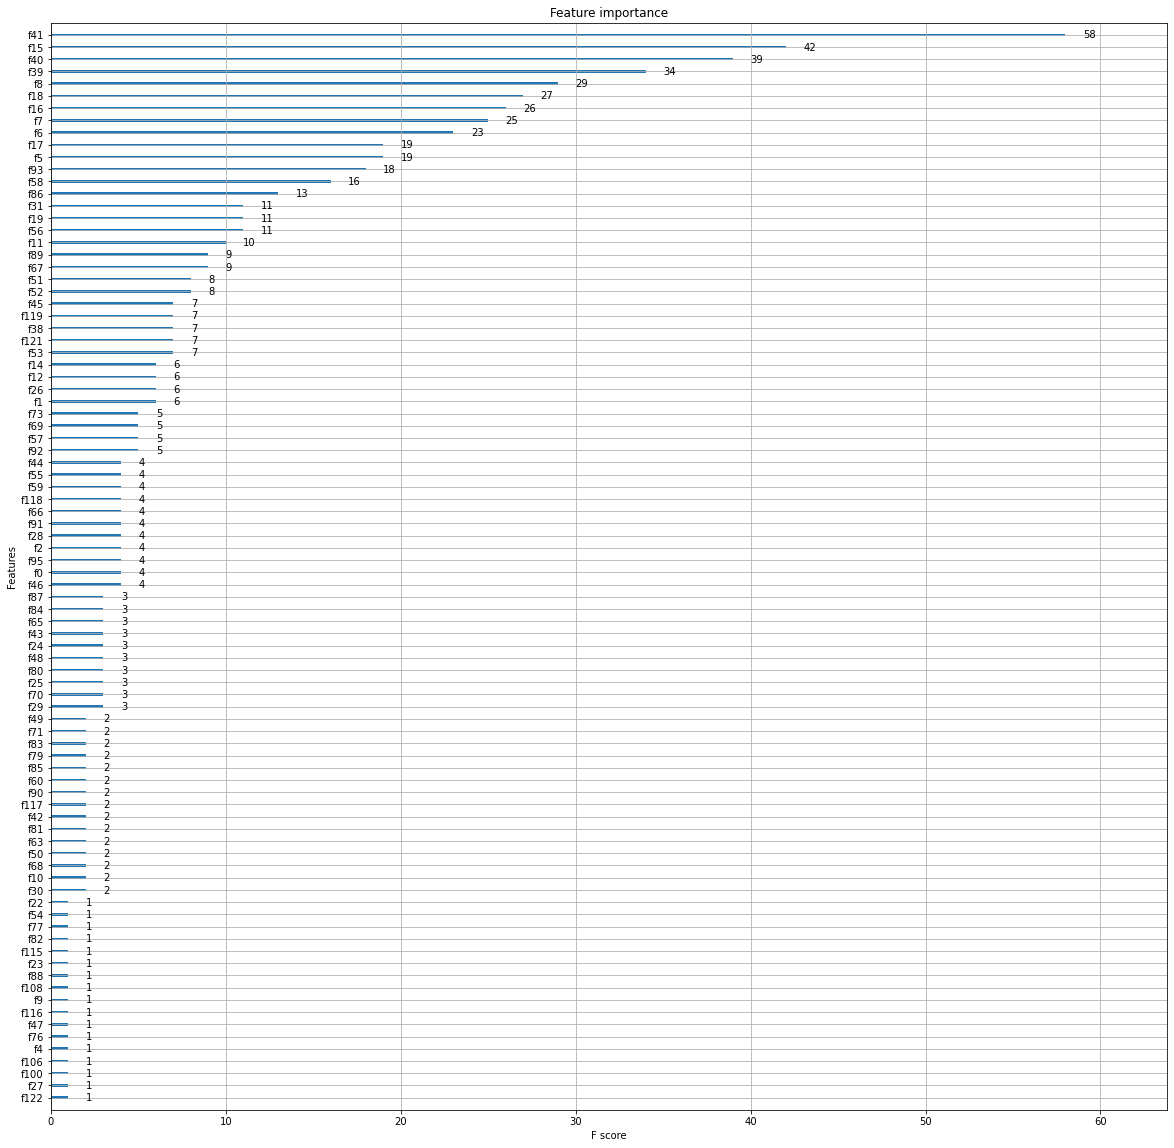

In [237]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)

In [236]:
myfeatures = merged_df.columns
dict_features = dict(enumerate(myfeatures))


axsub = xgb.plot_importance(final_gb )


Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures))
print(dict_features)

{0: 'NAME_CONTRACT_TYPE', 1: 'CODE_GENDER', 2: 'FLAG_OWN_CAR', 3: 'FLAG_OWN_REALTY', 4: 'CNT_CHILDREN', 5: 'AMT_INCOME_TOTAL', 6: 'AMT_CREDIT', 7: 'AMT_ANNUITY', 8: 'AMT_GOODS_PRICE', 9: 'NAME_TYPE_SUITE', 10: 'NAME_INCOME_TYPE', 11: 'NAME_EDUCATION_TYPE', 12: 'NAME_FAMILY_STATUS', 13: 'NAME_HOUSING_TYPE', 14: 'REGION_POPULATION_RELATIVE', 15: 'DAYS_BIRTH', 16: 'DAYS_EMPLOYED', 17: 'DAYS_REGISTRATION', 18: 'DAYS_ID_PUBLISH', 19: 'OWN_CAR_AGE', 20: 'FLAG_MOBIL', 21: 'FLAG_EMP_PHONE', 22: 'FLAG_WORK_PHONE', 23: 'FLAG_CONT_MOBILE', 24: 'FLAG_PHONE', 25: 'FLAG_EMAIL', 26: 'OCCUPATION_TYPE', 27: 'CNT_FAM_MEMBERS', 28: 'REGION_RATING_CLIENT', 29: 'REGION_RATING_CLIENT_W_CITY', 30: 'WEEKDAY_APPR_PROCESS_START', 31: 'HOUR_APPR_PROCESS_START', 32: 'REG_REGION_NOT_LIVE_REGION', 33: 'REG_REGION_NOT_WORK_REGION', 34: 'LIVE_REGION_NOT_WORK_REGION', 35: 'REG_CITY_NOT_LIVE_CITY', 36: 'REG_CITY_NOT_WORK_CITY', 37: 'LIVE_CITY_NOT_WORK_CITY', 38: 'ORGANIZATION_TYPE', 39: 'EXT_SOURCE_1', 40: 'EXT_SOURCE_

## XGBoost DMatrix 사용

In [ ]:
params['random_state']=42
params['learning_rate']=0.2 
params['tree_method']='auto'
params['early_stopping_rounds'] = 50
params['n_estimator']=500
params['scale_pos_weight']=ratio
params['seed'] = 42
params['objective'] = 'binary:hinge'

In [ ]:
dtrain = xgb.DMatrix(data=X_train , label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(data=X_val , label=y_val, feature_names=feature_names)

In [ ]:
wlist = [(dtrain, 'train'), (dval,'eval')]

xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

### tuning max_depth, min_child_weight

In [195]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [199]:
min_error = 0.082
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
[19:37:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator, scale_pos_weight } might not be 

In [201]:
params['max_depth'] = 9
params['min_child_weight'] = 6

### tuning subsample, colsample

In [211]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [213]:
min_error = 0.082
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    params['subsample'] = subsample
    params['colsample'] = colsample

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=0.7, colsample=0.7
[19:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:46:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, sc

In [214]:
params['subsample'] = 0.8
params['colsample'] = 0.7

### tuning ETA

In [216]:
min_error = 0.082
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        metrics={'error'},
        early_stopping_rounds=10
    )

    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
[19:51:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } migh

In [217]:
params['eta'] = 0.3

In [218]:
params

{'subsample': 0.8,
 'min_child_weight': 6,
 'max_depth': 9,
 'gamma': 1,
 'colsample_bytree': 0.8,
 'objective': 'binary:hinge',
 'scale_pos_weight': 11.476606363069244,
 'seed': 42,
 'random_state': 42,
 'learning_rate': 0.2,
 'tree_method': 'auto',
 'early_stopping_rounds': 50,
 'n_estimator': 500,
 'colsample': 0.7,
 'eta': 0.3}

In [177]:
num_rounds = 100

In [219]:
wlist = [(dtrain, 'train'), (dval,'eval')]

xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=200, evals=wlist)

[19:55:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { colsample, early_stopping_rounds, n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.91985	eval-error:0.91800
[1]	train-error:0.91985	eval-error:0.91800
[2]	train-error:0.25945	eval-error:0.28540
[3]	train-error:0.09380	eval-error:0.13110
[4]	train-error:0.07408	eval-error:0.10160
[5]	train-error:0.06915	eval-error:0.09260
[6]	train-error:0.06732	eval-error:0.08830
[7]	train-error:0.06822	eval-error:0.08580
[8]	train-error:0.06885	eval-error:0.08500
[9]	train-error:0.06955	eval-error:0.08430
[10]	train-error:0.07037	eval-error:0.08380
[11]	train-error:0.07055	eval-error:0.08370
[12]	train-error:0.07093	eval-error:0.08350
[13]	train-error:0.07078	

In [220]:
pred = xgb_model.predict(dval)

In [221]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9180
           1       0.25      0.08      0.13       820

    accuracy                           0.90     10000
   macro avg       0.59      0.53      0.54     10000
weighted avg       0.87      0.90      0.88     10000



### 특성중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

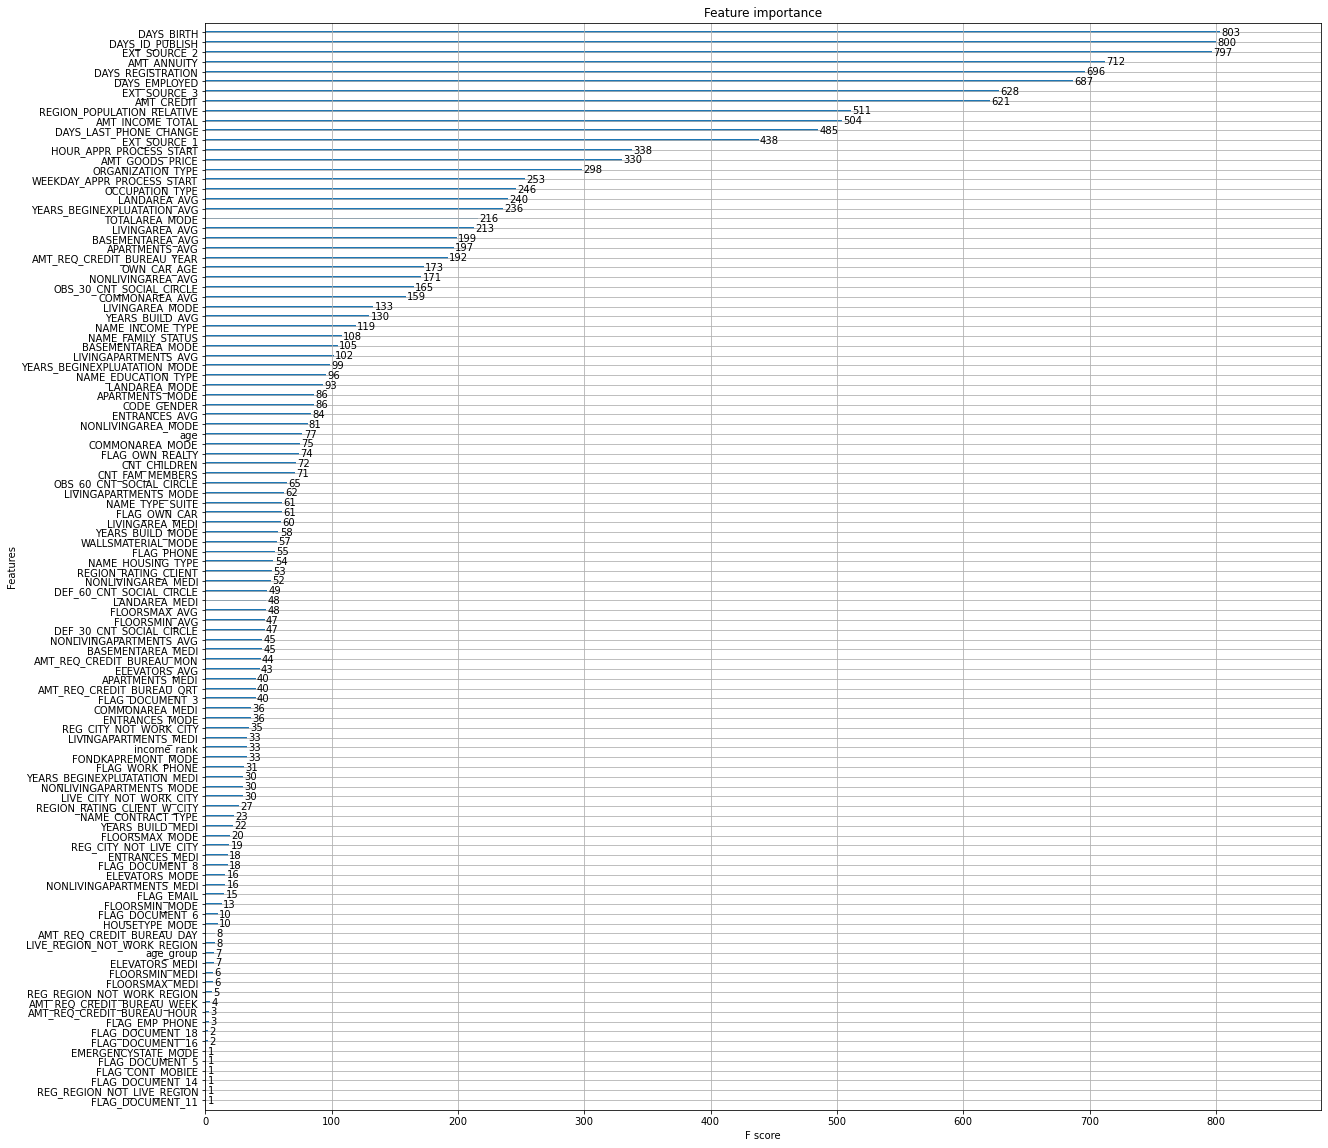

In [224]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(xgb_model, ax=ax)

# previous 데이터 가지고 모델 생성해서 진행해보기


In [243]:
merged_df.shape

(50000, 106)

In [244]:
merged_df.info(), merged_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 106 entries, SK_ID_CURR to nb_app
dtypes: category(2), float64(47), int64(57)
memory usage: 40.2 MB


(None, (50000, 106))

In [273]:
# dtypes가 category인 경우 변환
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
merged_df['income_rank'] = lbl.fit_transform(merged_df['income_rank'].astype(str))
merged_df['age_group'] = lbl.fit_transform(merged_df['age_group'].astype(str))

In [274]:
merged_df.info(), merged_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 106 entries, SK_ID_CURR to nb_app
dtypes: float64(47), int64(59)
memory usage: 40.8 MB


(None, (50000, 106))

In [245]:
merged_df['TARGET'].value_counts(normalize=True)

0    0.91784
1    0.08216
Name: TARGET, dtype: float64

In [284]:
m_train, m_val = train_test_split(merged_df, train_size=0.80, test_size=0.20, 
                              stratify=merged_df[target], random_state=42)

In [285]:
m_X_train = m_train.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
m_y_train = m_train['TARGET']

m_X_val = m_val.drop(columns=['TARGET','SK_ID_CURR'], axis=1)
m_y_val = m_val['TARGET']

m_X_train.shape, m_y_train.shape, m_X_val.shape, m_y_val.shape

((40000, 104), (40000,), (10000, 104), (10000,))

## 랜덤 포레스트 모델

In [248]:
## 랜덤포레스트 활용해보기
pipe = make_pipeline(
     SimpleImputer(),
     RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

In [249]:
pipe.fit(m_X_train, m_y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [250]:
#pipe.fit(X_train, y_train)

print('검증 정확도', pipe.score(m_X_val, m_y_val))

print(classification_report(m_y_val, pipe.predict(m_X_val)))



검증 정확도 0.9178
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9178
           1       0.50      0.00      0.00       822

    accuracy                           0.92     10000
   macro avg       0.71      0.50      0.48     10000
weighted avg       0.88      0.92      0.88     10000



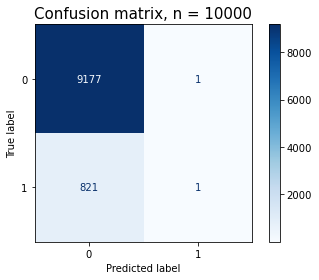

In [251]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, m_X_val, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

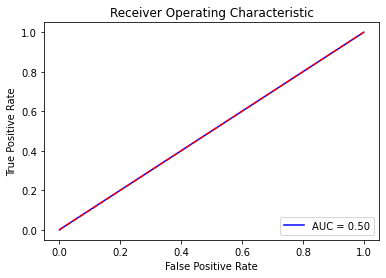

In [252]:
buildROC(m_y_val, pipe.predict(m_X_val))

In [253]:
## 랜덤포레스트 

In [254]:
## LGBM 분류기 만들기

m_clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate= 0.02,
    num_leaves=32,
    subsample=0.8, #?
    max_depth = 12, #?
    silent=-1, #?
    berbose=-1
)

m_clf.fit(m_X_train, m_y_train, eval_set = [(m_X_train, m_y_train), (m_X_val, m_y_val)],
eval_metric='auc', verbose=100, early_stopping_rounds =50)

[LightGBM] [Warning] Unknown parameter: berbose
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.81832	training's binary_logloss: 0.235056	valid_1's auc: 0.742104	valid_1's binary_logloss: 0.254926
[200]	training's auc: 0.865785	training's binary_logloss: 0.215667	valid_1's auc: 0.749139	valid_1's binary_logloss: 0.251574
[300]	training's auc: 0.89816	training's binary_logloss: 0.201595	valid_1's auc: 0.751019	valid_1's binary_logloss: 0.250833
Early stopping, best iteration is:
[273]	training's auc: 0.890866	training's binary_logloss: 0.204957	valid_1's auc: 0.751486	valid_1's binary_logloss: 0.250761


LGBMClassifier(berbose=-1, learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8)

In [255]:
print('검증 정확도', m_clf.score(m_X_val, m_y_val))

print(classification_report(m_y_val, m_clf.predict(m_X_val)))

검증 정확도 0.9182
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9178
           1       0.59      0.02      0.03       822

    accuracy                           0.92     10000
   macro avg       0.75      0.51      0.49     10000
weighted avg       0.89      0.92      0.88     10000



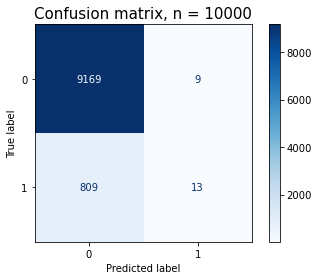

In [256]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(m_clf, m_X_val, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

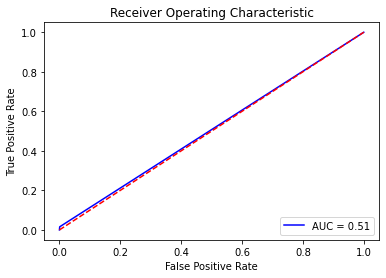

In [257]:
buildROC(m_y_val, m_clf.predict(m_X_val))

In [300]:
###  오히려 성능 향상에 크게 차이가 없음.

## XGBClassifier


In [276]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [286]:
vc = m_y_train.value_counts().tolist()
ratio = float(vc[0]/vc[1])

In [287]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 10]
        }

In [288]:
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.2, 
                    tree_method='auto',
                    early_stopping_rounds = 50,
                    n_estimator=500,
                    scale_pos_weight=ratio) # imbalanced이므로 사용

In [289]:
folds = 3
param_comb = 5

In [290]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc', 
                                   cv=skf.split(m_X_train, m_y_train), verbose=3, random_state=42 )

In [291]:
start_time = timer(None)
random_search.fit(m_X_train, m_y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[20:32:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.8s
[20:32:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.7s
[20:32:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=5, subsample=0.6; total time=   2.6s
[20:32:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=   5.3s
[20:32:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=   5.4s
[20:32:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=5, max_depth=7, min_child_weight=5, subsample=0.6; total time=   5.5s
[20:32:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.4s
[20:32:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.4s
[20:32:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=1, subsample=0.6; total time=   2.4s
[20:32:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=   2.7s
[20:32:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=   2.7s
[20:32:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8; total time=   2.7s
[20:32:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   3.5s
[20:33:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:33:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   3.6s
[20:33:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:33:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0; total time=   3.5s
[20:33:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:33:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



 Time taken: 0 hours 0 minutes and 53.77 seconds.


In [292]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)



 All results:
{'mean_fit_time': array([2.63974468, 5.32320897, 2.39643033, 2.69085654, 3.50705902]), 'std_fit_time': array([0.0981833 , 0.06957313, 0.0147995 , 0.00719571, 0.02410593]), 'mean_score_time': array([0.03146672, 0.04010177, 0.02821835, 0.03145512, 0.03776375]), 'std_score_time': array([0.00233493, 0.00100919, 0.00079807, 0.00226819, 0.00182594]), 'param_subsample': masked_array(data=[0.6, 0.6, 0.6, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 1, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 7, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 5, 1, 1.5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
          

In [293]:
model = random_search.best_estimator_

In [294]:
pred = model.predict(m_X_val)

In [295]:
print('검증 정확도', model.score(m_X_val, m_y_val))

print(classification_report(m_y_val, model.predict(m_X_val)))

검증 정확도 0.7203
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      9178
           1       0.17      0.63      0.27       822

    accuracy                           0.72     10000
   macro avg       0.56      0.68      0.55     10000
weighted avg       0.89      0.72      0.78     10000



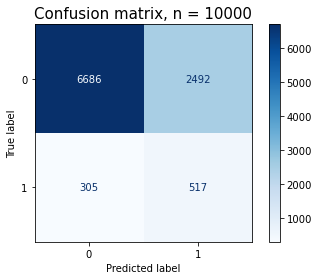

In [296]:
# confusion matrix 플롯
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, m_X_val, m_y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(m_y_val)}', fontsize=15)
plt.show()

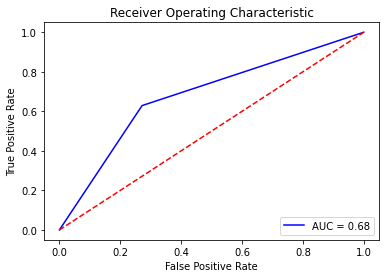

In [297]:
buildROC(m_y_val, pred)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

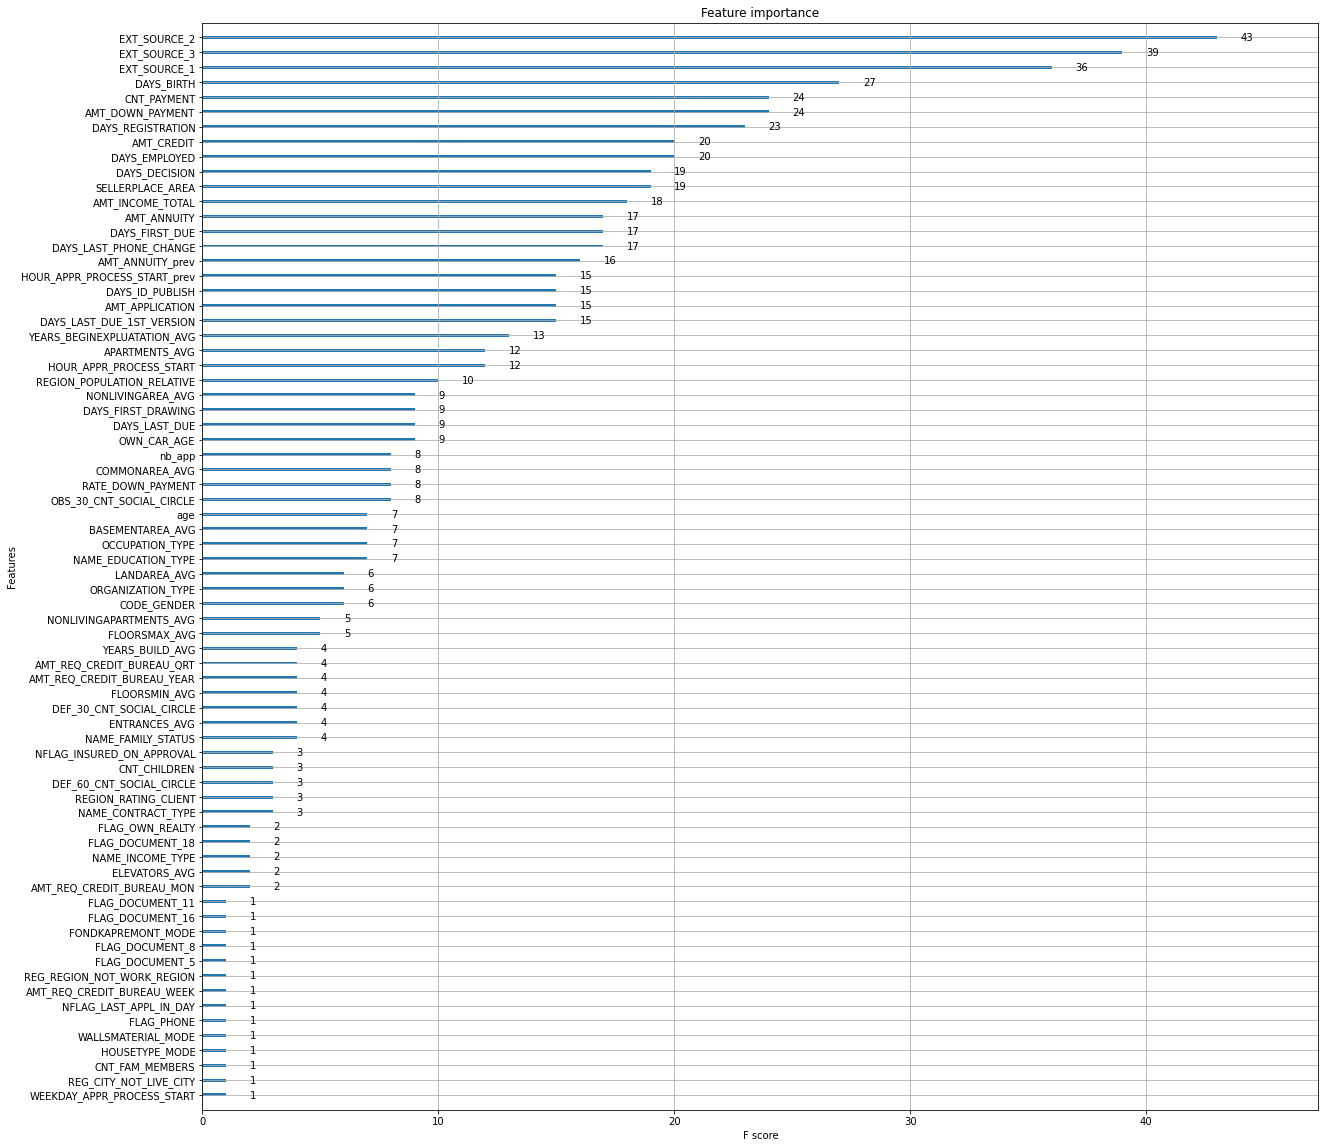

In [298]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)

In [299]:
myfeatures = merged_df.columns
dict_features = dict(enumerate(myfeatures))


axsub = xgb.plot_importance(final_gb )


Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures))
print(dict_features)

AttributeError: 'XGBClassifier' object has no attribute 'plot_importance'